In [183]:
# Players
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
%matplotlib inline


## Data Overview
### df_players
- personal details mostly.
- currentTeamId
- wyId
- id 
### df_teams
- Nothing really
- id
### matches

In [53]:
# player data
df_players = pd.read_json("players.json")
player_cols = ['passportArea','currentTeamId']
print(df_players.shape)
print(df_players.columns)
df_players.head(1)

(3603, 14)
Index(['passportArea', 'weight', 'firstName', 'middleName', 'lastName',
       'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId',
       'foot', 'shortName', 'currentNationalTeamId'],
      dtype='object')


,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687


In [131]:
df = df_players
# ids= {'id':[],'name':[]}
ids = []
df['playerId'] = df.apply(lambda row: row.passportArea['id'], axis = 1)
df['fullName'] = df.apply(lambda row: row.firstName+" "+row.lastName, axis = 1)
df['playerId'].unique().shape
for idx,row in df.iterrows():
    ids += [row['passportArea']['id']]
#     ids['id'] += [row['passportArea']['id']]
#     ids['name'] += [row['fullName']]
df_players = df


In [143]:
# Team Data
df_teams = pd.read_json("teams.json")
print(df_teams.columns)
print(df_teams['area'].loc[0])
df_teams.head(1)

Index(['city', 'name', 'wyId', 'officialName', 'area', 'type'], dtype='object')
{'name': 'England', 'id': '0', 'alpha3code': 'XEN', 'alpha2code': ''}


,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [37]:
# Competitions Data
compet = pd.read_json("competitions.json")
print(compet['area'].loc[0])
compet.head(1)

{'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'}


,name,wyId,format,area,type
0,Italian first division,524,Domestic league,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club


In [125]:
# match data
all_files = glob.glob( "matches/*.json")
matches = pd.read_json(all_files[0])
for x in range(1,len(all_files)):
    matches = matches.append(pd.read_json(all_files[x]))

matches['eventId'] = matches.apply(lambda row: row.wyId, axis = 1)

matches.head(1)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId,eventId
0,Played,4165368,0,"{'9598': {'scoreET': 0, 'coachId': 122788, 'si...",10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2",2018-07-15 17:00:00-02:00,,"[{'refereeId': 378051, 'role': 'referee'}, {'r...",Regular,28,2058017


In [126]:
# event data
all_files = glob.glob( "events/*.json")
events = pd.read_json(all_files[0])
# for x in range(1,len(all_files)):
#     events = events.append(pd.read_json(all_files[x]))

print(events.shape)
print(events.columns)
events.head(1)

(632807, 12)
Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id'],
      dtype='object')


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686,Pass,3799,1H,1.935181,85,176505119


In [127]:
events.loc[0]

eventId                                                8
subEventName                                 Simple pass
tags                                      [{'id': 1801}]
playerId                                          253784
positions       [{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]
matchId                                          2500686
eventName                                           Pass
teamId                                              3799
matchPeriod                                           1H
eventSec                                         1.93518
subEventId                                            85
id                                             176505119
Name: 0, dtype: object

### - matchId: the identifier of the match the event refers to. The identifier refers to the field "wyId" in the match dataset;

In [146]:
# Join Players and Teams
players_teams = df_players.merge(df_teams,left_on='currentTeamId',right_on='wyId')
players_teams


,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,...,shortName,currentNationalTeamId,playerId,fullName,city,name,wyId_y,officialName,area,type
0,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",...,M. Sarr,4423,686,Malang Sarr,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",65,Patrick,,Burner,3775,1996-04-11,170,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Martinique', 'id': '474', 'alpha3cod...",...,P. Burner,null,250,Patrick Burner,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
2,"{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...",65,Jean Micha\u00ebl,,Seri,3775,1991-07-19,168,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...",...,J. Seri,null,384,Jean Micha\u00ebl Seri,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
3,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",80,Marlon,,Santos da Silva Barbosa,3775,1995-09-07,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Brazil', 'id': '76', 'alpha3code': '...",...,Marlon,null,76,Marlon Santos da Silva Barbosa,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",68,Romain,,Perraud,3775,1997-09-22,173,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",...,R. Perraud,4426,250,Romain Perraud,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",67,Tom,,Cleverley,1644,1989-08-12,175,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",...,T. Cleverley,null,0,Tom Cleverley,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2435,"{'name': 'Jamaica', 'id': 388, 'alpha3code': '...",78,Andre,,Gray,1644,1991-06-26,180,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",...,A. Gray,null,388,Andre Gray,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2436,"{'name': 'Mali', 'id': 466, 'alpha3code': 'MLI...",75,Abdoulaye,,Doucour\u00e9,1644,1993-01-01,183,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",...,A. Doucour\u00e9,null,466,Abdoulaye Doucour\u00e9,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2437,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",74,Will,,Hughes,1644,1995-04-17,185,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",...,W. Hughes,null,0,Will Hughes,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [140]:
# Join Matches and Competition
matches_compet = matches.merge(compet,left_on='wyId', right_on='wyId')

matches_compet

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId,eventId,name,format,area,type


In [173]:
# Join Event dataset and Matches dataset

# match_events = events.merge(matches,how='left',on='eventId')
match_events = events.merge(matches, left_on='matchId', right_on='wyId')
print(match_events.shape)
# print(match_events.columns)

# Join Event,Matches dataset with Players dataset 
df = match_events.merge(df_players, left_on='playerId', right_on='wyId')
print(df.shape)

# Join Event, Matches, Players dataset with Teams dataset
df = df.merge(df_teams, left_on='teamId', right_on='wyId')
print(df.shape)

(632807, 28)
(585512, 44)
(585512, 50)


In [174]:
# Find a game with PSG
df_teams = df[df['officialName']=='Paris Saint-Germain FC']
unique(list(df_teams['label']))
# unique(list(df['officialName']))

['Metz - PSG, 1 - 5',
 'PSG - Olympique Lyonnais, 2 - 0',
 'Montpellier - PSG, 0 - 0',
 'PSG - Bordeaux, 6 - 2',
 'Dijon - PSG, 1 - 2',
 'Olympique Marseille - PSG, 2 - 2',
 'PSG - Nice, 3 - 0',
 'Angers SCO - PSG, 0 - 5',
 'Monaco - PSG, 1 - 2',
 'PSG - Troyes, 2 - 0',
 'Strasbourg - PSG, 2 - 1',
 'PSG - Lille, 3 - 1',
 'Rennes - PSG, 1 - 4',
 'PSG - Caen, 3 - 1',
 'Nantes - PSG, 0 - 1',
 'PSG - Dijon, 8 - 0',
 'Olympique Lyonnais - PSG, 2 - 1',
 'Toulouse - PSG, 0 - 1',
 'PSG - Olympique Marseille, 3 - 0',
 'PSG - Metz, 5 - 0',
 'Nice - PSG, 1 - 2',
 'PSG - Angers SCO, 2 - 1',
 'Saint-\\u00c9tienne - PSG, 1 - 1',
 'Bordeaux - PSG, 0 - 1',
 'PSG - Guingamp, 2 - 2',
 'Amiens SC - PSG, 2 - 2',
 'PSG - Rennes, 0 - 2',
 'PSG - Amiens SC, 2 - 0',
 'Guingamp - PSG, 0 - 3',
 'PSG - Toulouse, 6 - 2',
 'PSG - Nantes, 4 - 1',
 'Lille - PSG, 0 - 3',
 'PSG - Strasbourg, 5 - 2',
 'Troyes - PSG, 0 - 2',
 'PSG - Monaco, 7 - 1',
 'PSG - Saint-\\u00c9tienne, 3 - 0',
 'Caen - PSG, 0 - 0',
 'PSG - Montp

In [187]:
df_psg = df[df['label']=='PSG - Olympique Marseille, 3 - 0']
df_psg.shape

(1421, 50)

In [239]:
print(unique(list(df_psg['eventName'])))
print(unique(list(df_psg['subEventName'])))

['Pass', 'Duel', 'Shot', 'Free Kick', 'Foul', 'Others on the ball', 'Offside', 'Save attempt', 'Goalkeeper leaving line']
['Simple pass', 'High pass', 'Ground loose ball duel', 'Ground defending duel', 'Shot', 'Free Kick', 'Ground attacking duel', 'Foul', 'Touch', 'Clearance', 'Cross', 'Head pass', 'Air duel', 'Smart pass', 'Throw in', 'Corner', 'Launch', 'Acceleration', '', 'Free kick cross', 'Out of game foul', 'Hand pass', 'Goal kick', 'Reflexes', 'Save attempt', 'Late card foul', 'Goalkeeper leaving line']


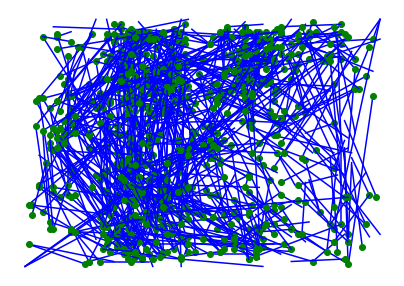

In [238]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Tidy Axes
plt.axis('off')

pass_cols = ['Simple pass','High pass','Smart pass']
goal_cols = ['Shot']
for idx,row in df_psg.iterrows():
    positions = row.positions
#     print(row['fullName'])
#     break
#     if row['subEventName'] in pass_cols:
    
#     if row['name'] == 'PSG' and row['fullName']=='Neymar da Silva Santos Junior':
    if row['eventName'] == 'Pass':
        Xstart = positions[0]['x']
        Ystart = positions[0]['y']
        Xend = positions[1]['x']
        Yend = positions[1]['y']
        plt.plot([int(Xstart),int(Xend)],
                 [int(Ystart),int(Yend)], 
                 color="blue")
        plt.plot(int(Xstart),int(Ystart),"o", color="green")
#     if row['eventName'] == 'Shot':
#         Xstart = positions[0]['x']
#         Ystart = positions[0]['y']
#         Xend = positions[1]['x']
#         Yend = positions[1]['y']
#         plt.plot([int(Xstart),int(Xend)],
#                  [int(Ystart),int(Yend)], 
#                  color="yellow")
#             
            

        

#Display Pitch
plt.show()


In [ ]:
# #Pitch Outline & Centre Line
# plt.plot([0,0],[0,90], color="black")
# plt.plot([0,130],[90,90], color="black")
# plt.plot([130,130],[90,0], color="black")
# plt.plot([130,0],[0,0], color="black")
# plt.plot([65,65],[0,90], color="black")

# #Left Penalty Area
# plt.plot([16.5,16.5],[65,25],color="black")
# plt.plot([0,16.5],[65,65],color="black")
# plt.plot([16.5,0],[25,25],color="black")

# #Right Penalty Area
# plt.plot([130,113.5],[65,65],color="black")
# plt.plot([113.5,113.5],[65,25],color="black")
# plt.plot([113.5,130],[25,25],color="black")

# #Left 6-yard Box
# plt.plot([0,5.5],[54,54],color="black")
# plt.plot([5.5,5.5],[54,36],color="black")
# plt.plot([5.5,0.5],[36,36],color="black")

# #Right 6-yard Box
# plt.plot([130,124.5],[54,54],color="black")
# plt.plot([124.5,124.5],[54,36],color="black")
# plt.plot([124.5,130],[36,36],color="black")

# #Prepare Circles
# centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
# centreSpot = plt.Circle((65,45),0.8,color="black")
# leftPenSpot = plt.Circle((11,45),0.8,color="black")
# rightPenSpot = plt.Circle((119,45),0.8,color="black")

# #Draw Circles
# ax.add_patch(centreCircle)
# ax.add_patch(centreSpot)
# ax.add_patch(leftPenSpot)
# ax.add_patch(rightPenSpot)

# #Prepare Arcs
# leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
# rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

# #Draw Arcs
# ax.add_patch(leftArc)
# ax.add_patch(rightArc)